# Survival Analysis with Cox Proportional Hazards Model

This notebook provides a hands-on introduction to survival analysis using a
small synthetic dataset. The goal is to demonstrate key concepts such as
censoring, survival functions, and hazard ratios using Kaplan–Meier estimation
and the Cox proportional hazards model.

⚠️ Due to the very small sample size, results are illustrative only and not
intended for statistical inference or causal conclusions.


In [ ]:
!pip install lifelines pandas matplotlib seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter, CoxPHFitter


In [3]:
data = pd.DataFrame({
    "time": [12, 8, 15, 6],
    "event": [1, 0, 1, 1],
    "age": [65, 58, 72, 55],
    "treatment": [1, 0, 1, 0]
})

data


,time,event,age,treatment
0,12,1,65,1
1,8,0,58,0
2,15,1,72,1
3,6,1,55,0


## Dataset Description

This is a small synthetic (toy) survival dataset created for educational
purposes.

**Variables**
- `time`: observed follow-up time
- `event`: event indicator (1 = event occurred, 0 = censored)
- `age`: age at baseline
- `treatment`: treatment group (0 = control, 1 = treated)


In [6]:

kmf = KaplanMeierFitter()

kmf.fit( durations=data["time"], event_observed=data["event"] )

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 4 total observations, 1 right-censored observations>

## Kaplan–Meier Interpretation

The Kaplan–Meier curve represents the estimated probability of surviving beyond
a given time point. Drops in the curve correspond to observed events, while flat
segments indicate periods with no events. Censored observations contribute to
the risk set but do not cause drops in the curve.


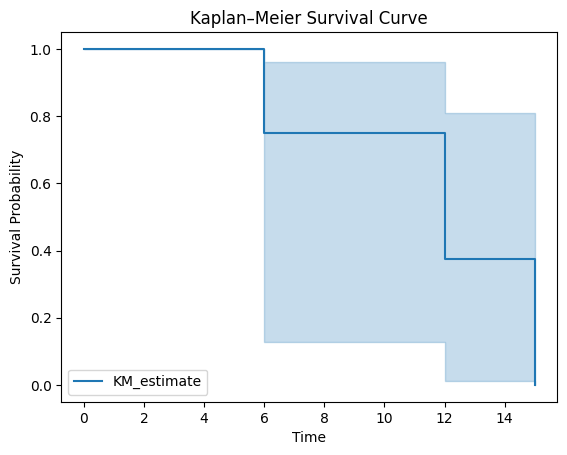

In [7]:
kmf.plot_survival_function()
plt.title("Kaplan–Meier Survival Curve")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

## Kaplan–Meier Survival Curve — Interpretation

This figure shows the Kaplan–Meier estimate of the survival function, where the
y-axis represents the estimated survival probability and the x-axis represents
time.

- **Stepwise pattern**
  - Each downward step corresponds to an observed event.
  - Flat segments indicate periods during which no events occurred.

- **Confidence intervals**
  - The shaded region represents the 95% confidence interval around the survival
    estimate.
  - The wide confidence bands reflect substantial uncertainty, which is expected
    given the very small sample size.

- **Observed survival pattern**
  - Survival probability remains close to 1.0 at early time points, indicating
    no early events.
  - Pronounced drops at later times reflect the occurrence of events among a
    small number of individuals.
  - By the end of follow-up, the estimated survival probability decreases
    substantially, but this estimate is highly uncertain.

- **Statistical interpretation**
  - The Kaplan–Meier curve provides a descriptive, non-parametric summary of
    time-to-event behavior.
  - No causal or inferential conclusions should be drawn from this curve due to
    the limited number of observations and events.

Overall, this Kaplan–Meier curve should be interpreted as an illustrative example
of survival analysis rather than a reliable estimate of the underlying survival
function.


In [8]:
cph = CoxPHFitter()

cph.fit(
    data,
    duration_col="time",
    event_col="event"
)


/usr/local/lib/python3.12/dist-packages/lifelines/fitters/coxph_fitter.py:1589: ConvergenceWarning: The log-likelihood is getting suspiciously close to 0 and the delta is still large. There may be complete separation in the dataset. This may result in incorrect inference of coefficients. See https://stats.stackexchange.com/q/11109/11867 for more.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/lifelines/utils/__init__.py:1163: ConvergenceWarning: Column age has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete separation'.     See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.12/dist-packages/lifelines/utils/__init__.py:1163: ConvergenceWarning: Column treatment has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete 

<lifelines.CoxPHFitter: fitted with 4 total observations, 1 right-censored observations>

In [9]:
cph.summary


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,-3.149316,4.288144e-02,37.541192,-76.728701,70.430068,4.754980e-34,3.867141e+30,0.0,-0.083890,0.933144,0.099828
treatment,20.323170,6.702555e+08,460.329940,-881.906933,922.553272,0.000000e+00,inf,0.0,0.044149,0.964786,0.051720


## Cox Model Output Interpretation

### General Model
- The Cox proportional hazards model is defined as  
  $$ h(t \mid X) = h_0(t)\,\exp(X\beta) $$
- Each coefficient $\beta_j$ represents the log hazard ratio.
- Hazard ratios are computed as  
  $$ HR_j = \exp(\beta_j) $$

---

### Age
- Estimated coefficient:  
  $$ \hat{\beta}_{age} = -3.149316 $$
- Standard error:  
  $$ SE(\hat{\beta}_{age}) = 37.541192 $$
- 95% confidence interval for the coefficient:  
  $$ [-76.728701,\; 70.430068] $$
- Hazard ratio:  
  $$ HR_{age} = \exp(-3.149316) = 4.288144 \times 10^{-2} $$
- 95% confidence interval for the hazard ratio:  
  $$ [4.754980 \times 10^{-34},\; 3.867141 \times 10^{30}] $$
- Wald statistic and p-value:  
  $$ z = -0.083890,\quad p = 0.933144 $$
- Interpretation: Age is not statistically significant. The extremely large
  standard error and very wide confidence intervals indicate severe numerical
  instability rather than a meaningful effect.

---

### Treatment
- Estimated coefficient:  
  $$ \hat{\beta}_{treatment} = 20.323170 $$
- Standard error:  
  $$ SE(\hat{\beta}_{treatment}) = 460.329940 $$
- 95% confidence interval for the coefficient:  
  $$ [-881.906933,\; 922.553272] $$
- Hazard ratio:  
  $$ HR_{treatment} = \exp(20.323170) = 6.702555 \times 10^{8} $$
- 95% confidence interval for the hazard ratio:  
  $$ [0,\; \infty) $$
- Wald statistic and p-value:  
  $$ z = 0.044149,\quad p = 0.964786 $$
- Interpretation: The treatment effect is not statistically significant. The
  extreme coefficient, infinite confidence interval, and very large standard
  error reflect model non-convergence and instability.

---

### Statistical Significance
- Hypothesis testing is based on  
  $$ H_0: \beta = 0 $$
- Observed p-values are  
  $$ p_{age} = 0.933144,\quad p_{treatment} = 0.964786 $$
- Since both p-values are far greater than $\alpha = 0.05$, the null hypothesis
  cannot be rejected for either covariate.

---

### Important Note on Model Stability
- The model was fitted using only 4 observations with 1 censored case.
- With such a small number of events, the partial likelihood becomes nearly flat,
  leading to:
  - Inflated standard errors
  - Extremely wide or infinite confidence intervals
  - Unstable hazard ratio estimates
- Therefore, numerical results should not be interpreted inferentially.

---

### Overall Conclusion
- The Cox model output is mathematically correct but statistically unreliable.
- All estimates are dominated by numerical instability caused by the extremely
  small sample size.
- The analysis should be viewed strictly as a methodological demonstration.


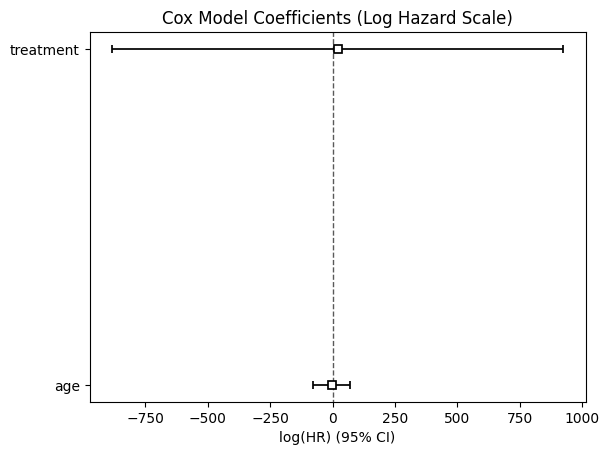

In [10]:
cph.plot()
plt.title("Cox Model Coefficients (Log Hazard Scale)")
plt.show()


## Cox Model Coefficients Plot — Interpretation (Log Hazard Scale)

This figure visualizes the Cox model coefficient estimates on the **log hazard ratio** scale,
i.e., the x-axis shows **log(HR)** with **95% confidence intervals** (horizontal bars). The
vertical dashed line at **0** represents **no effect** (HR = 1).

- **Direction of effect**
  - Points to the **right of 0** indicate **increased hazard** (HR > 1).
  - Points to the **left of 0** indicate **decreased hazard** (HR < 1).

- **Age**
  - The point estimate for **age** is close to 0 and its 95% CI is relatively narrow on this plot.
  - This suggests **no clear evidence** of an age effect in this toy dataset.

- **Treatment**
  - The **treatment** interval is extremely wide, spanning a very large range and crossing 0.
  - This indicates **severe estimation uncertainty / numerical instability**, so the treatment effect
    is **not reliably identifiable** from the data.

- **Statistical takeaway**
  - Since the confidence intervals **cross 0**, there is **no statistically significant association**
    detected for these covariates at conventional thresholds.
  - The unusually wide CI (especially for treatment) is expected with an **extremely small sample size**
    and limited number of events, so results should be interpreted as **illustrative only**.


## Model Assumptions

The Cox proportional hazards model relies on the following assumptions:
1. Proportional hazards over time
2. Independent censoring
3. Correct specification of covariate effects

Due to the very small sample size, these assumptions cannot be formally tested
in this example.


## Limitations

- Very small sample size
- Synthetic (toy) dataset
- Limited number of covariates
- Results are illustrative only
